In [104]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow import keras

In [105]:
nsl_kdd = pd.read_csv('KDD.csv')

In [106]:
nsl_kdd.head()

,duration,protocol_type,services,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [107]:
nsl_kdd['class']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: class, Length: 125973, dtype: object

<AxesSubplot:xlabel='class', ylabel='count'>

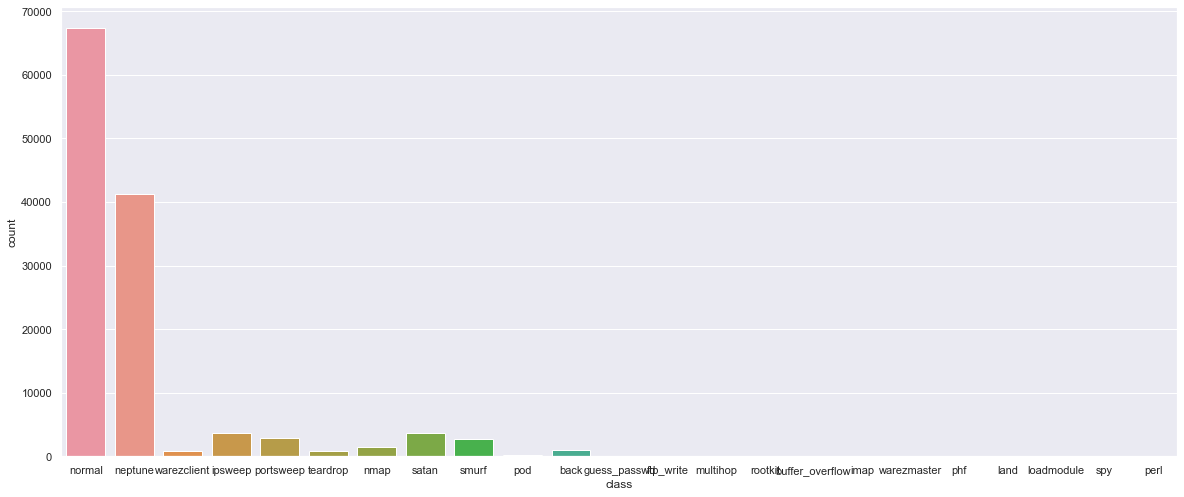

In [108]:
sb.set(rc={'figure.figsize':(20,8.27)})
sb.countplot(x='class', data=nsl_kdd)

In [109]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
nsl_kdd['class']= label_encoder.fit_transform(nsl_kdd['class']) 
nsl_kdd['class'].unique()

array([11,  9, 21,  5, 15, 20, 10, 17, 18, 14,  0,  3,  2,  8, 16,  1,  4,
       22, 13,  6,  7, 19, 12])

In [110]:
len(nsl_kdd['class'].unique())

23

In [111]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
nsl_kdd['services']= label_encoder.fit_transform(nsl_kdd['services']) 
nsl_kdd['services'].unique()

array([20, 44, 49, 24, 51, 36, 38, 14, 35, 60, 18, 12, 58, 67,  2, 54,  7,
       66, 37, 65,  4, 11, 19,  5, 32, 15, 21, 68, 59, 26, 16, 69, 28, 29,
       13, 30, 33, 57, 34, 31, 55, 63, 23, 17, 43, 10, 42,  6,  8, 56,  9,
       53, 40, 47, 41,  0, 46, 48, 62, 45, 50, 39, 52,  1, 64, 27,  3, 25,
       61, 22])

In [112]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
nsl_kdd['flag']= label_encoder.fit_transform(nsl_kdd['flag']) 
nsl_kdd['flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [113]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
nsl_kdd['protocol_type']= label_encoder.fit_transform(nsl_kdd['protocol_type']) 
nsl_kdd['protocol_type'].unique()

array([1, 2, 0])

In [114]:
nsl_kdd.tail()

,duration,protocol_type,services,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,9,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,11,21
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,11,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,9,20
125972,0,1,20,9,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,11,21


In [115]:
X = nsl_kdd.drop(['class'], axis=1)
Y = nsl_kdd['class']

In [116]:
type(nsl_kdd['protocol_type'])

pandas.core.series.Series

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.569, random_state=101) 

In [118]:
X_train_tensor = tf.convert_to_tensor(X_train)
Y_train_tensor = tf.convert_to_tensor(Y_train)
X_test_tensor = tf.convert_to_tensor(X_test)
Y_test_tensor = tf.convert_to_tensor(Y_test)

In [119]:
X_test_tensor.shape

TensorShape([71679, 42])

In [120]:
X_train_tensor.shape

TensorShape([54294, 42])

### CNN Model

In [121]:
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Conv1D(8, 3, padding="same", input_shape = (42, 1), activation = "relu"))
cnn_model.add(keras.layers.MaxPooling1D(pool_size=(2)))
cnn_model.add(keras.layers.Conv1D(16, 3, padding="same", activation="relu"))
cnn_model.add(keras.layers.MaxPooling1D(pool_size=(2)))
cnn_model.add(keras.layers.Conv1D(32, 3, padding="same", activation="relu"))
cnn_model.add(keras.layers.MaxPooling1D(pool_size=(2)))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(32, activation="relu"))
cnn_model.add(keras.layers.Dense(23, activation="softmax"))
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 42, 8)             32        
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 21, 8)            0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 21, 16)            400       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 10, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 10, 32)            1568      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 5, 32)           

In [122]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [123]:
epochs = 20
batch_size = 128
cnn = cnn_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
425/425 [==============================] - 4s 7ms/step - loss: 1039.9830 - accuracy: 0.7986
Epoch 2/20
425/425 [==============================] - 3s 6ms/step - loss: 1224.1884 - accuracy: 0.8604
Epoch 3/20
425/425 [==============================] - 3s 6ms/step - loss: 1030.7599 - accuracy: 0.8321
Epoch 4/20
425/425 [==============================] - 2s 6ms/step - loss: 1159.7360 - accuracy: 0.8500
Epoch 5/20
425/425 [==============================] - 2s 6ms/step - loss: 280.6790 - accuracy: 0.8805
Epoch 6/20
425/425 [==============================] - 3s 6ms/step - loss: 942.4297 - accuracy: 0.8653
Epoch 7/20
425/425 [==============================] - 3s 6ms/step - loss: 289.9695 - accuracy: 0.8762
Epoch 8/20
425/425 [==============================] - 3s 6ms/step - loss: 760.3583 - accuracy: 0.8660
Epoch 9/20
425/425 [==============================] - 3s 6ms/step - loss: 615.3575 - accuracy: 0.8698
Epoch 10/20
425/425 [==============================] - 3s 6ms/step - loss: 622

### CNN Model Predictions

In [124]:
cnn_train_pred = cnn_model.predict(X_train)
cnn_train_pred

1697/1697 [==============================] - 3s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.2183057e-31,
        7.7285429e-18, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.0009783e-09,
        0.0000000e+00, 3.4756502e-21],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.4248142e-11,
        0.0000000e+00, 9.5584176e-25],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.5150438e-09,
        0.0000000e+00, 4.1138976e-18],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3406486e-10,
        0.0000000e+00, 1.5776192e-14],
       [0.0000000e+00, 1.9764450e-29, 0.0000000e+00, ..., 0.0000000e+00,
        9.5891319e-06, 0.0000000e+00]], dtype=float32)

In [125]:
cnn_test_pred = cnn_model.predict(X_test)
cnn_test_pred

2240/2240 [==============================] - 3s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4274929e-21,
        2.3416779e-16, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.1852327e-09,
        0.0000000e+00, 7.3455887e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.3947945e-32,
        2.2010888e-22, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3409297e-27,
        9.9938913e-10, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.7214067e-07,
        4.2653883e-28, 2.0711802e-18],
       [3.7516826e-22, 8.2869760e-14, 1.2090085e-36, ..., 9.2587562e-16,
        5.3649427e-37, 9.9966395e-01]], dtype=float32)

In [126]:
from sklearn.metrics import accuracy_score
trainAcc_cnn = accuracy_score(Y_train, np.argmax(cnn_train_pred, axis=1))
testAcc_cnn = accuracy_score(Y_test, np.argmax(cnn_test_pred, axis=1))
print("Training Accuracy:", trainAcc_cnn)
print("Testing Accuracy:", testAcc_cnn)

Training Accuracy: 0.9369727778391719
Testing Accuracy: 0.9355180736338398


### Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rForestClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rForestClassifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [129]:
rForest_train_pred = rForestClassifier.predict(X_train)
rForest_train_pred

array([11,  9,  9, ...,  9, 15, 11])

In [130]:
rForest_test_pred = rForestClassifier.predict(X_test)
rForest_test_pred

array([11,  9, 11, ..., 11,  9, 11])

In [131]:
trainAcc_randomForest = accuracy_score(Y_train, rForest_train_pred)
testAcc_randomForest = accuracy_score(Y_test, rForest_test_pred)
print("Training Accuracy:", trainAcc_randomForest)
print("Testing Accuracy:", testAcc_randomForest)

Training Accuracy: 0.9999447452757211
Testing Accuracy: 0.9983537716765022


In [132]:
from tabulate import tabulate
 
model_accuracies = [
    ["CNN with 3 Convolutional Layers", trainAcc_cnn, testAcc_cnn],
    ["Random Forest Classifier", trainAcc_randomForest, testAcc_randomForest]
]
 
# create header
head = ["Model", "Training Accuracy", "Testing Accuracy"]
 
# display table
print(tabulate(model_accuracies, headers=head, tablefmt="grid"))

+---------------------------------+---------------------+--------------------+
| Model                           |   Training Accuracy |   Testing Accuracy |
+=================================+=====================+====================+
| CNN with 3 Convolutional Layers |            0.936973 |           0.935518 |
+---------------------------------+---------------------+--------------------+
| Random Forest Classifier        |            0.999945 |           0.998354 |
+---------------------------------+---------------------+--------------------+
